## Trace Analysis of SAT data

In [1]:
import warnings
#to suppress seaborn palette warnings
warnings.filterwarnings("ignore", category=UserWarning)
#to suppress seaborn error estimation NaN warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import os

import pandas as pd
import seaborn as sns

import loader
import trace_analysis

#to suppress pandas reassignment false positive warnings
pd.options.mode.chained_assignment = None  # default='warn'


#### Load Data

In [7]:
mo_path = 'C:\\Users\\swind\\Documents\\lab_work\\Barth\\behavior_analysis\\Mo_data\\CR'

metadata = pd.DataFrame()
metadata["Animal ID"] = pd.Series()

df = loader.make_animal_df(mo_path, metadata, 'OMV4', '', 6)
df["condition"] = "sat"
df["age"] = pd.NA
df["sex"] = 'na'
df["strain"] = 'ssflpxcrcre'

stats, means, counts, performance = trace_analysis.calculate_statistics(df, 300, 100, 4*60, 0, 0, 0, False)

OMV4: no metadata


### Anticipatory Licking Curves

#### 4 hours

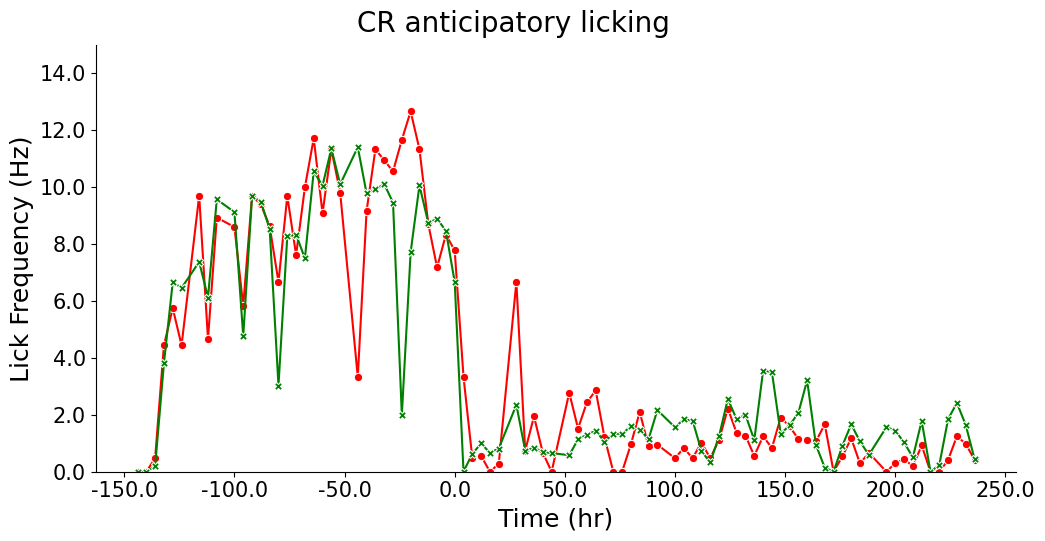

In [8]:
titles = {"all_reward":"100% water", "SAT": "80% water", "hm4di":"hM4Di + CNO", "mcherry":"mCherry + CNO"}
antlick = means[means["Time (ms)"] == 900]


g = sns.relplot(antlick, x="Time (hr)", y="lick", hue="trial type", palette=["red", "green"], hue_order=["blank", "water"], 
                kind="line", errorbar="se", err_style="bars", style="trial type", dashes=False, markers=True, aspect=2, legend=False)
    
g.fig.suptitle("CR anticipatory licking", x=.48, y=1.04,size=20)
for ax in g.axes.flat:
    #ax.axvline(x=0, ymin=0, ymax=1, ls="--", color="lightgrey", zorder=0)
    ax.set_xticklabels(ax.get_xticks(), ha='center', fontdict={"fontsize":15})
    ax.tick_params(labelbottom=True)
    ax.set_ylim([0, 15])
    ax.set_yticklabels(ax.get_yticks(), fontdict={"fontsize":15})
    ax.set_ylabel("Lick Frequency (Hz)", size=18)
    ax.set_xlabel("Time (hr)", size=18)


### Number of trials

#### 4 hours

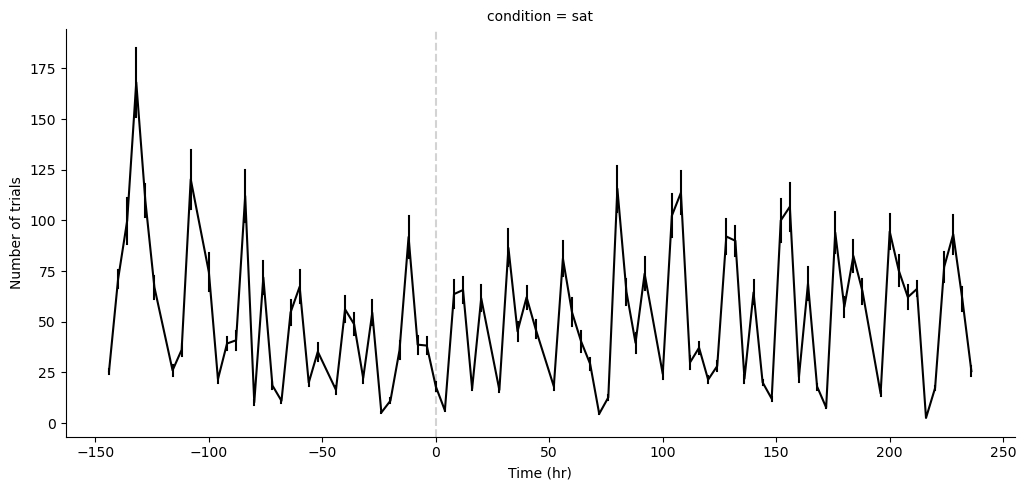

In [9]:

g = sns.relplot(counts, x="Time (hr)", y="trial no", color="k", kind="line", col="condition",errorbar="se", err_style="bars", aspect=2, col_wrap=2)


for ax in g.axes.flat:
    ax.axvline(x=0, ymin=0, ymax=1, ls="--", color="lightgrey", zorder=0)
    ax.set_ylabel("Number of trials")

### Air Puff licking curves (licking 300 ms after puff)

#### 4 hours

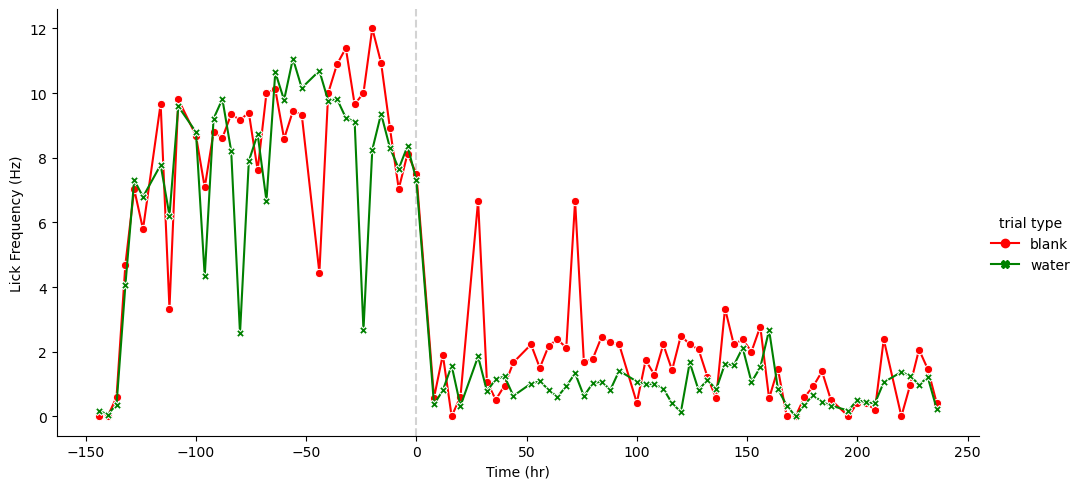

In [10]:
pufflick4h = means[means["Time (ms)"] == 300]

g = sns.relplot(pufflick4h, x="Time (hr)", y="lick", hue="trial type", palette=["red", "green"], hue_order=["blank", "water"], 
            kind="line", errorbar="se", err_style="bars", style="trial type", dashes=False, markers=True, aspect=2)
for ax in g.axes.flat:
    ax.axvline(x=0, ymin=0, ymax=1, ls="--", color="lightgrey", zorder=0)
    ax.tick_params(labelbottom=True)
    ax.set_ylabel("Lick Frequency (Hz)")

### Full licking curves by timebin

#### Full train time, 4 hour timebins

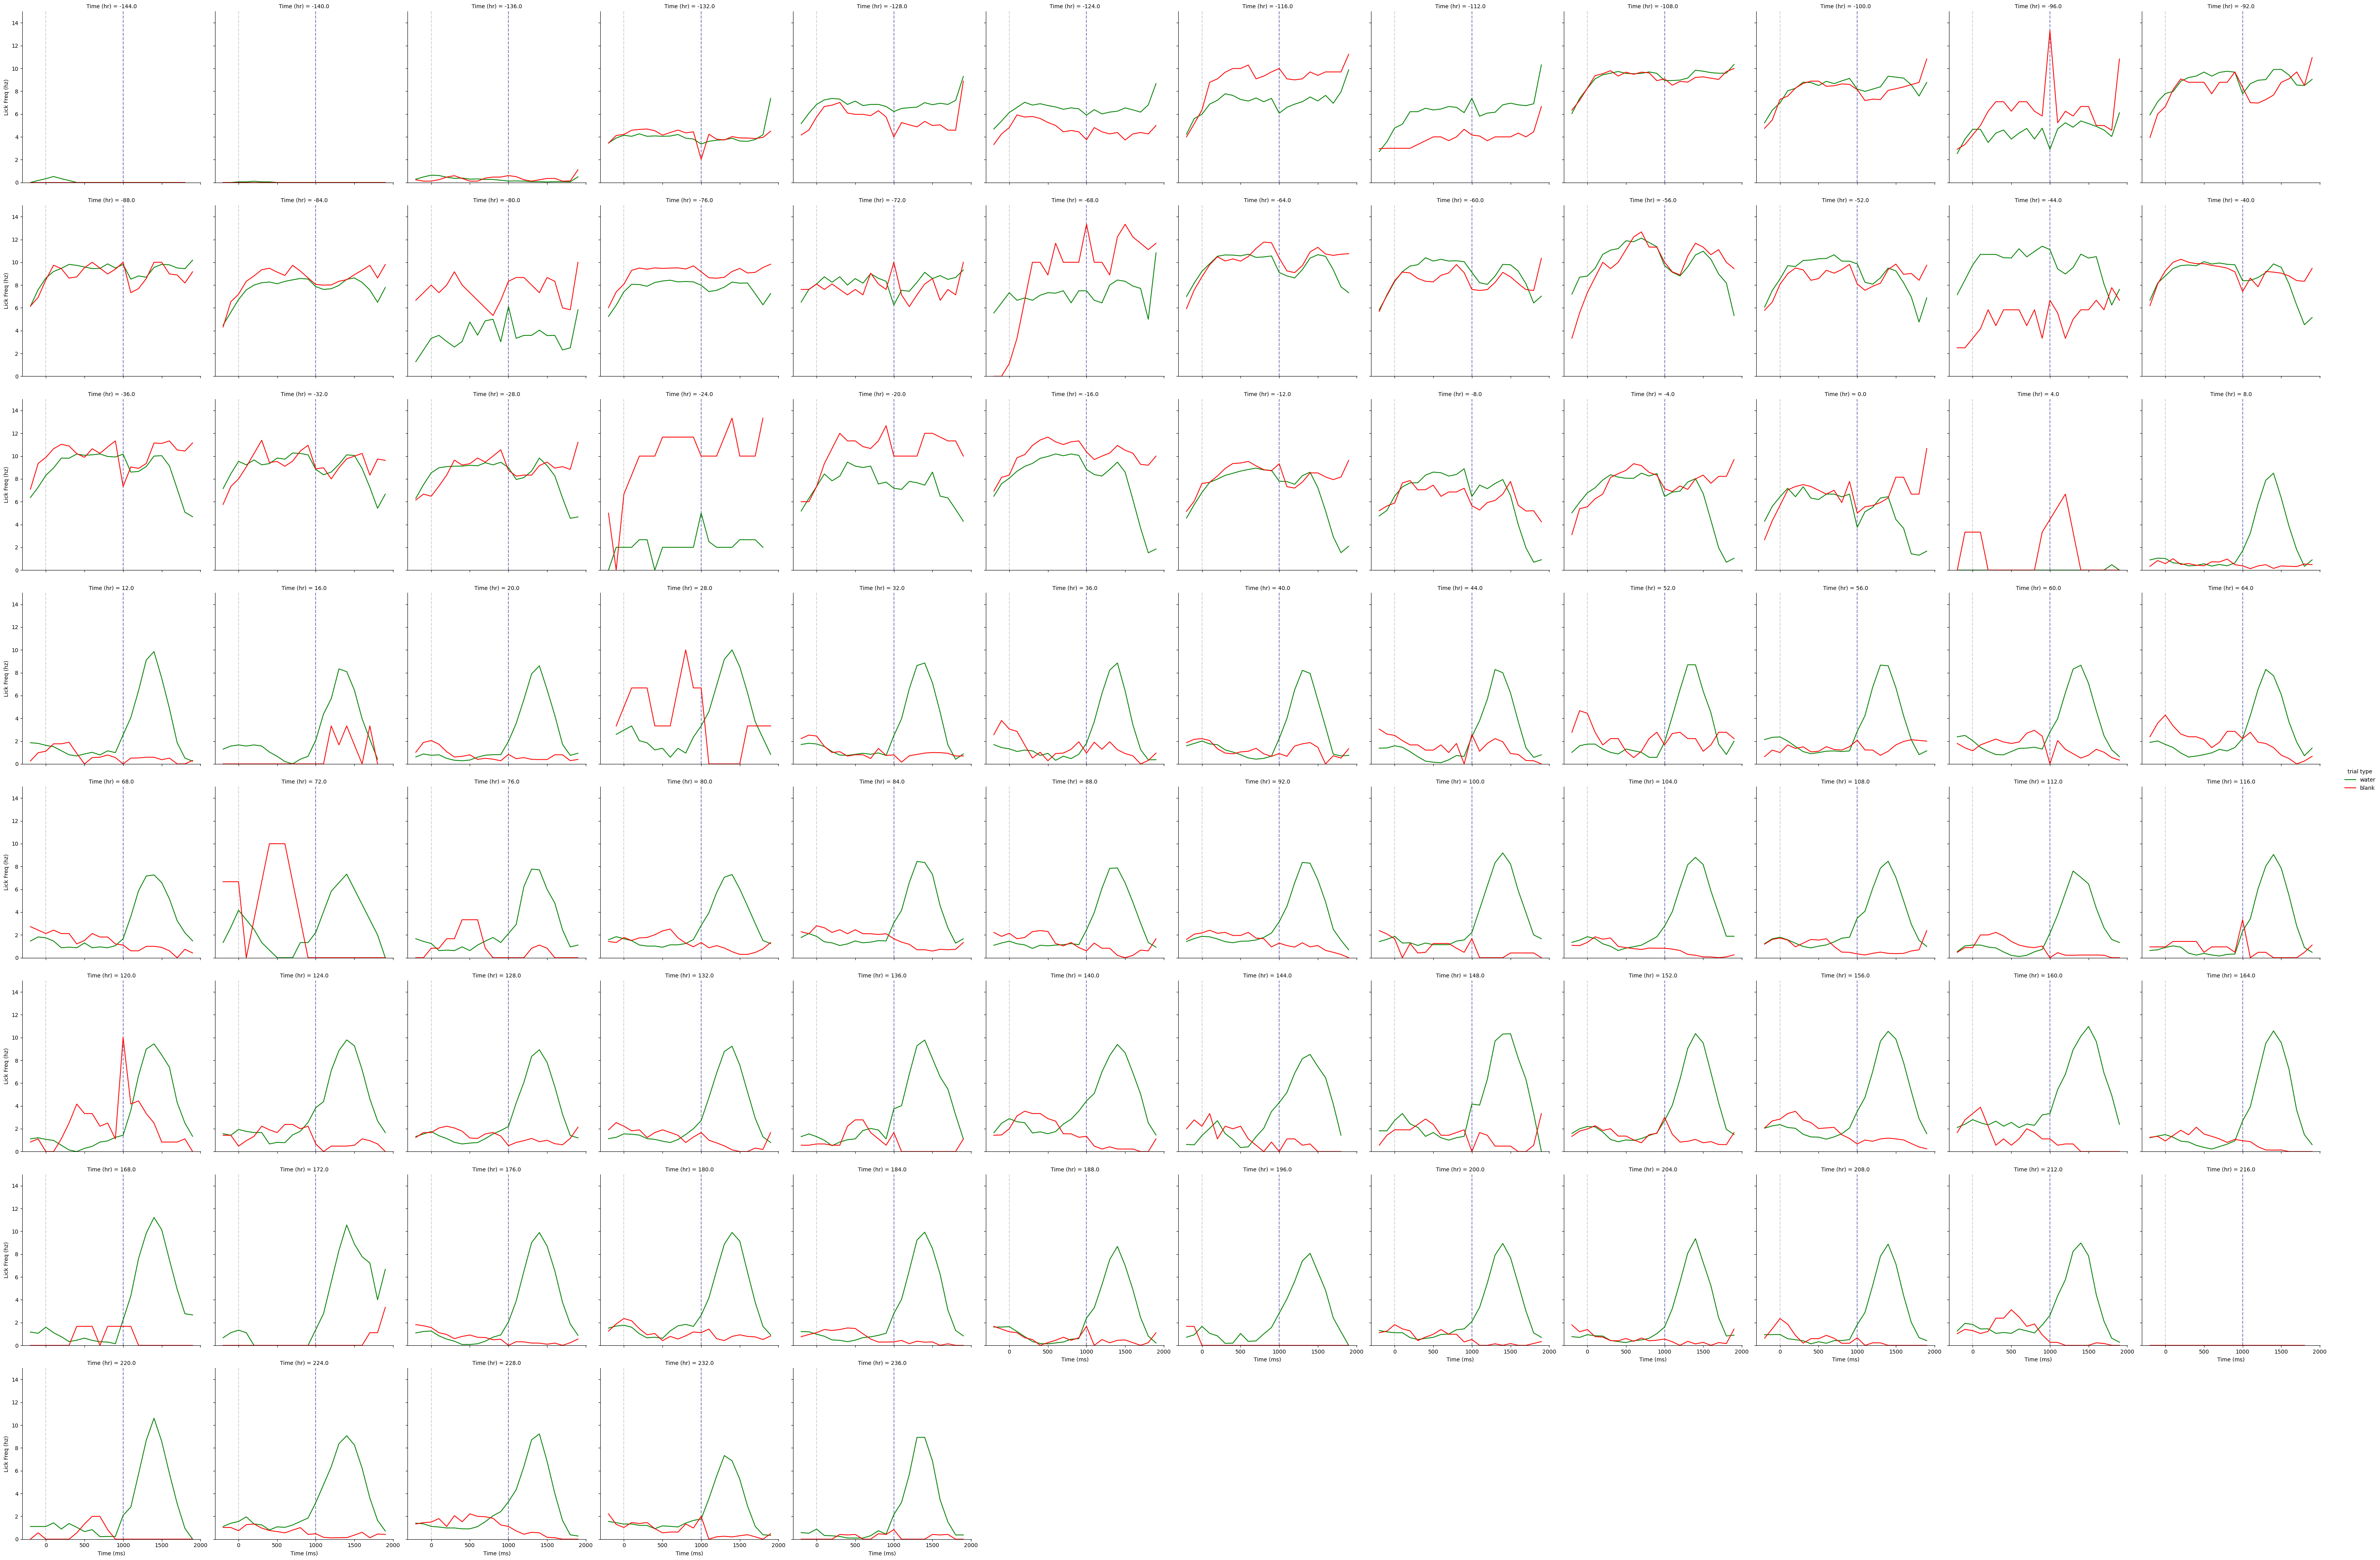

In [12]:
# only plot last day of acclimation and first day of SAT
cond = (means["Time (hr)"] < 24) & (means["Time (hr)"] > -24)

# plot all timebins average performance trace on the same plot
g = sns.relplot(data=means,kind="line",x="Time (ms)", y="lick",col="Time (hr)", col_wrap=12,
                hue="trial type", palette=["green", "red"], hue_order=["water", "blank"], errorbar="se",err_style="bars", legend="full")


# add lines at air puff and water delivery
for ax in g.axes.flat:
    ax.axhline(y=0, xmin=0, xmax=1, ls="-", lw=0.75,color="black", zorder=0)
    ax.axvline(x=0, ymin=0, ymax=1, ls="--", color="lightgrey", zorder=0)
    ax.axvline(x=1000, ymin=0, ymax=1, ls="--", color="navy", alpha=0.5, zorder=0)
    ax.set_ylim([0, 15])
    ax.set_ylabel("Lick Freq (hz)")

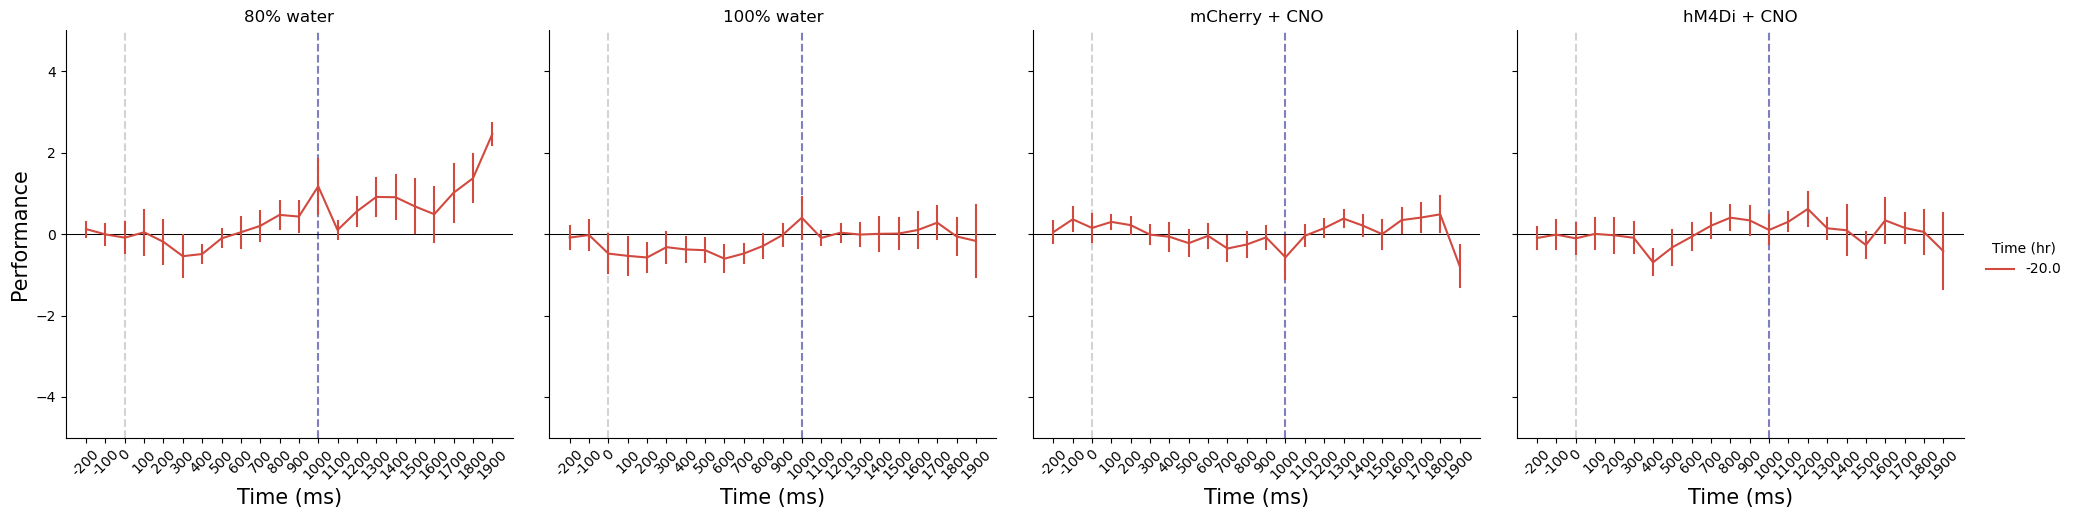

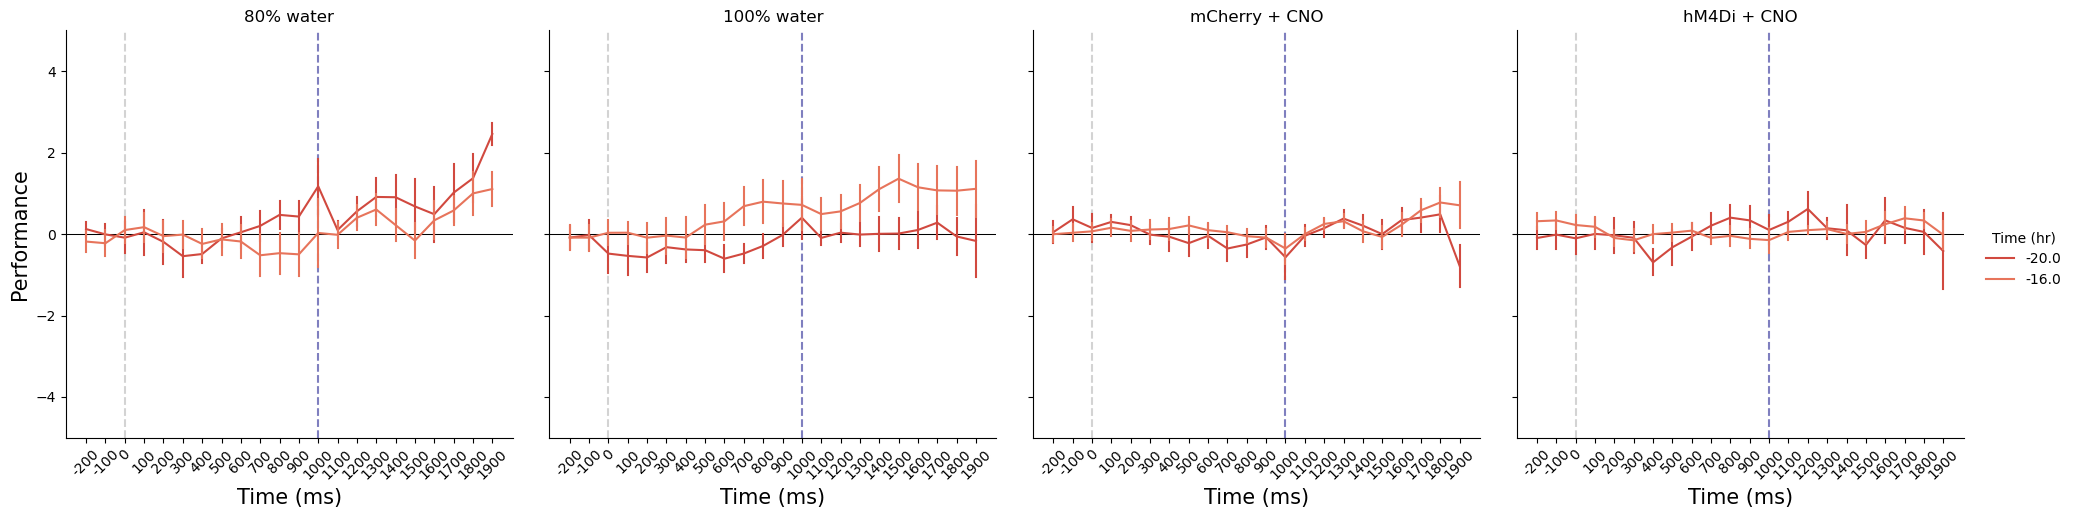

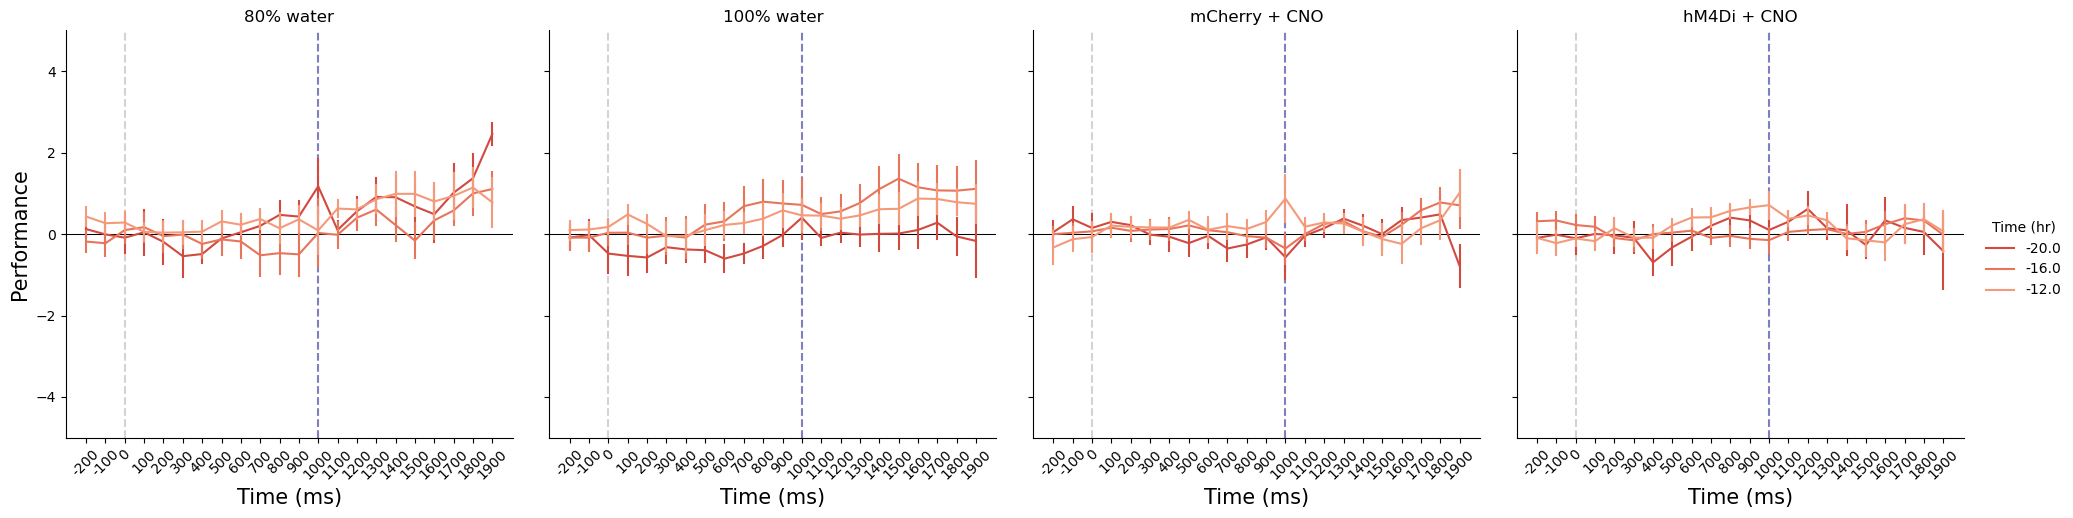

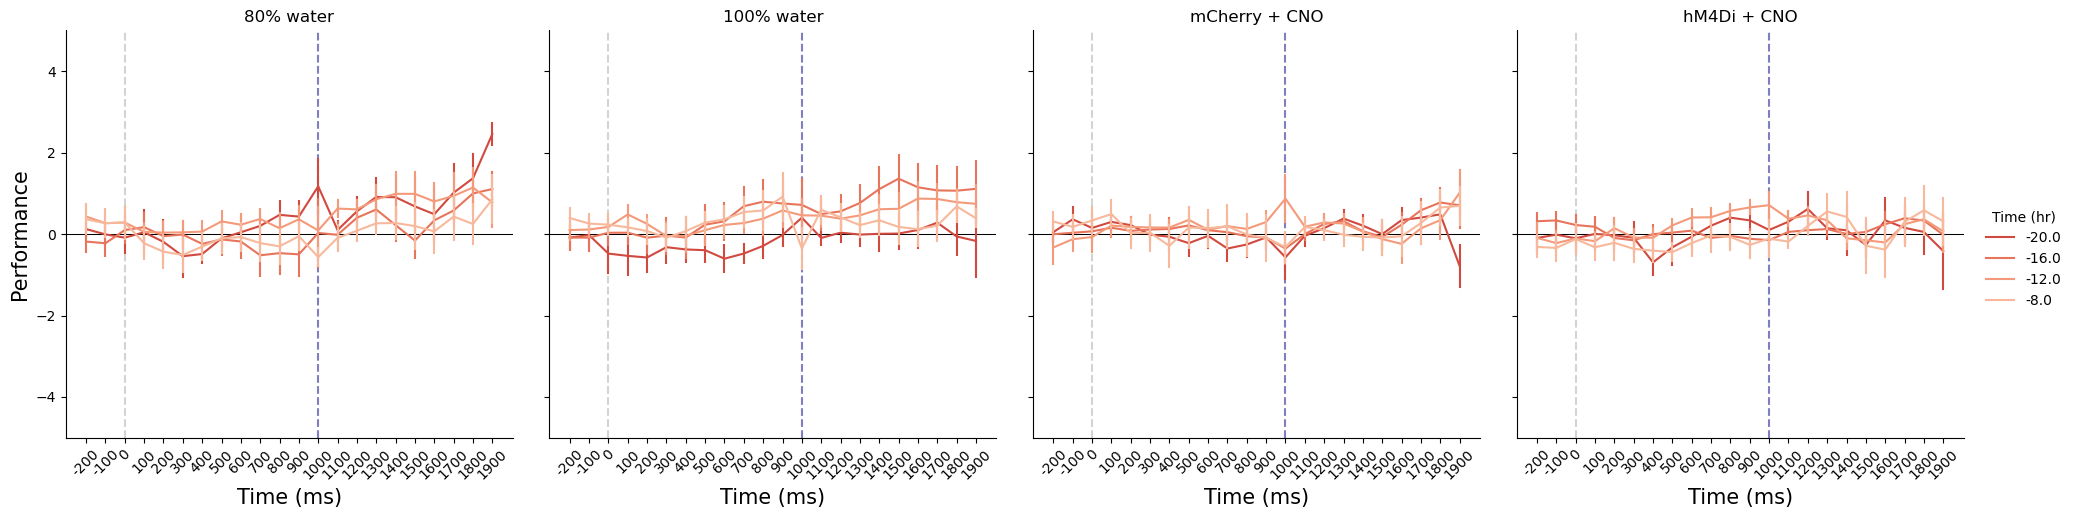

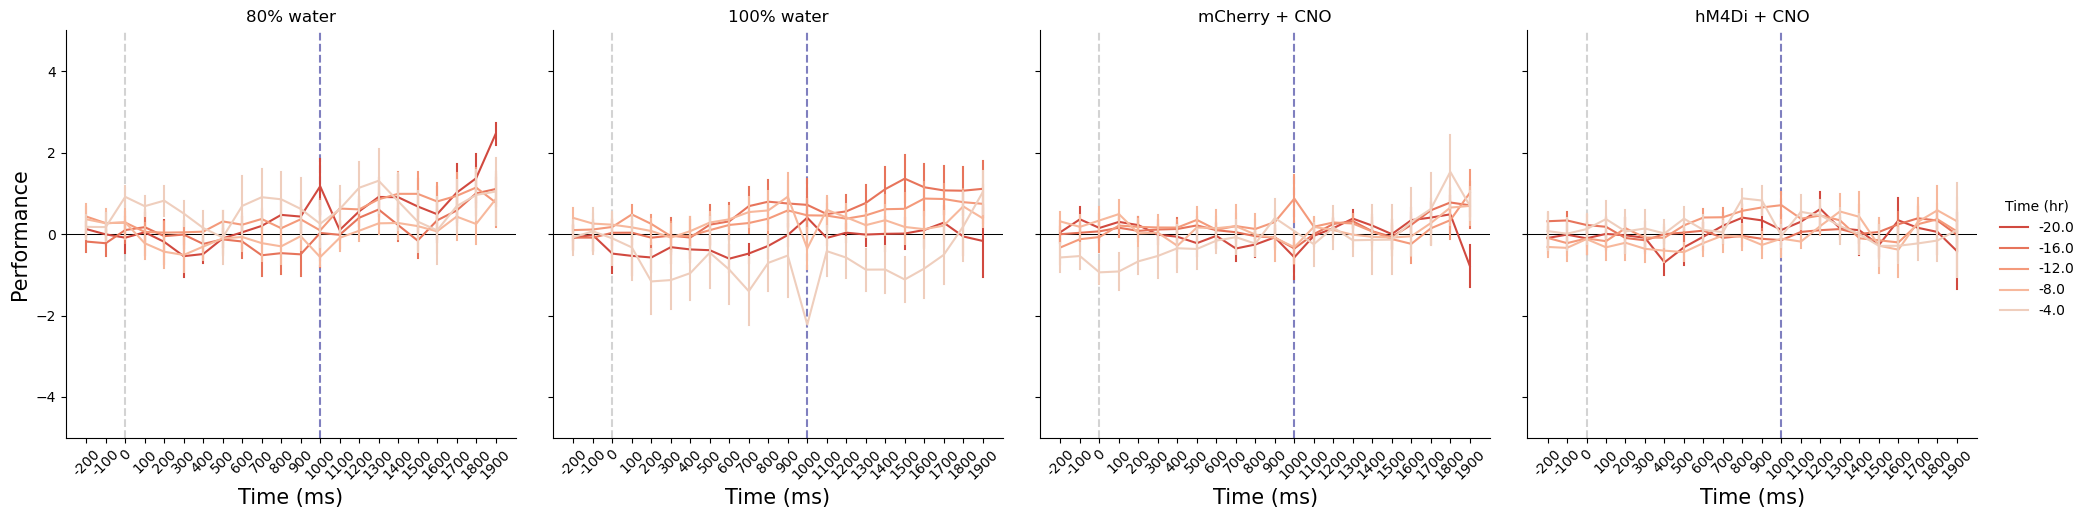

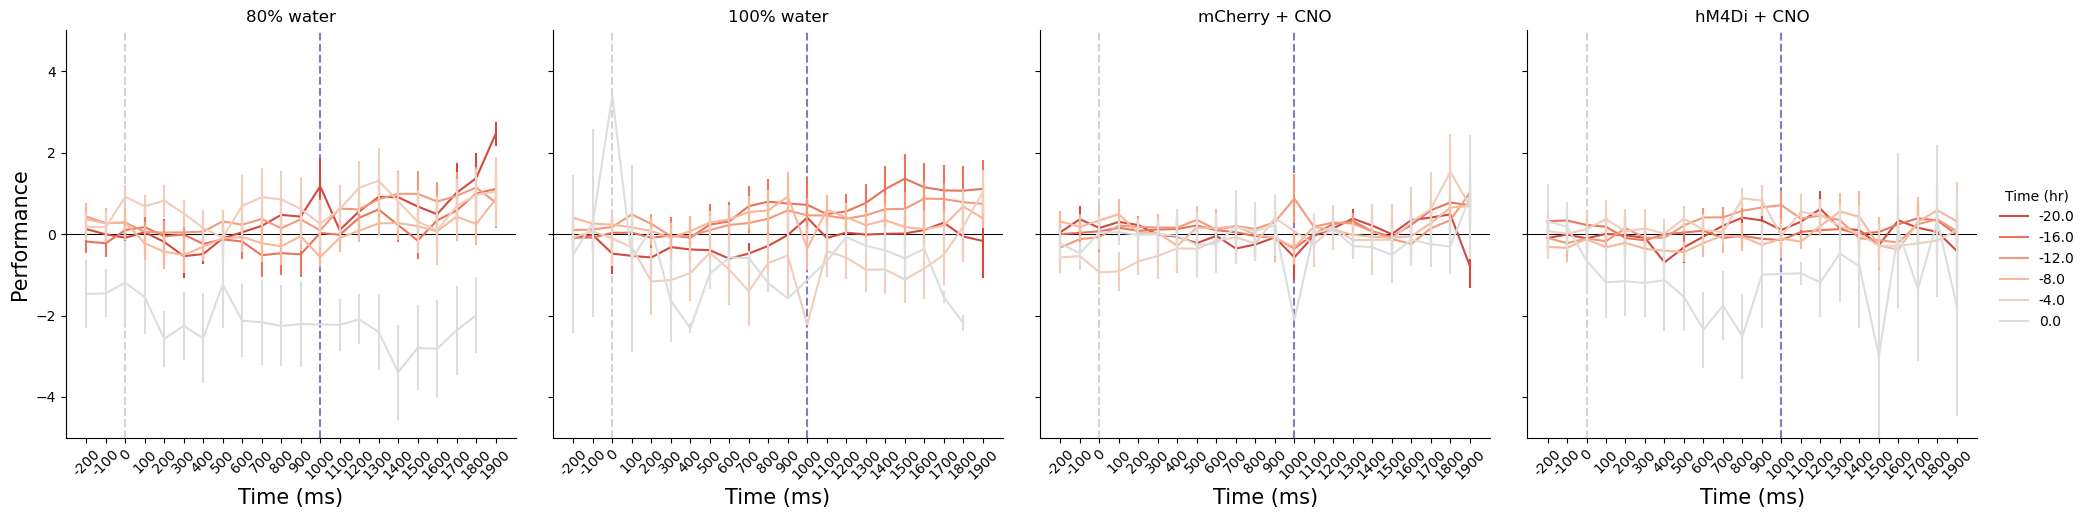

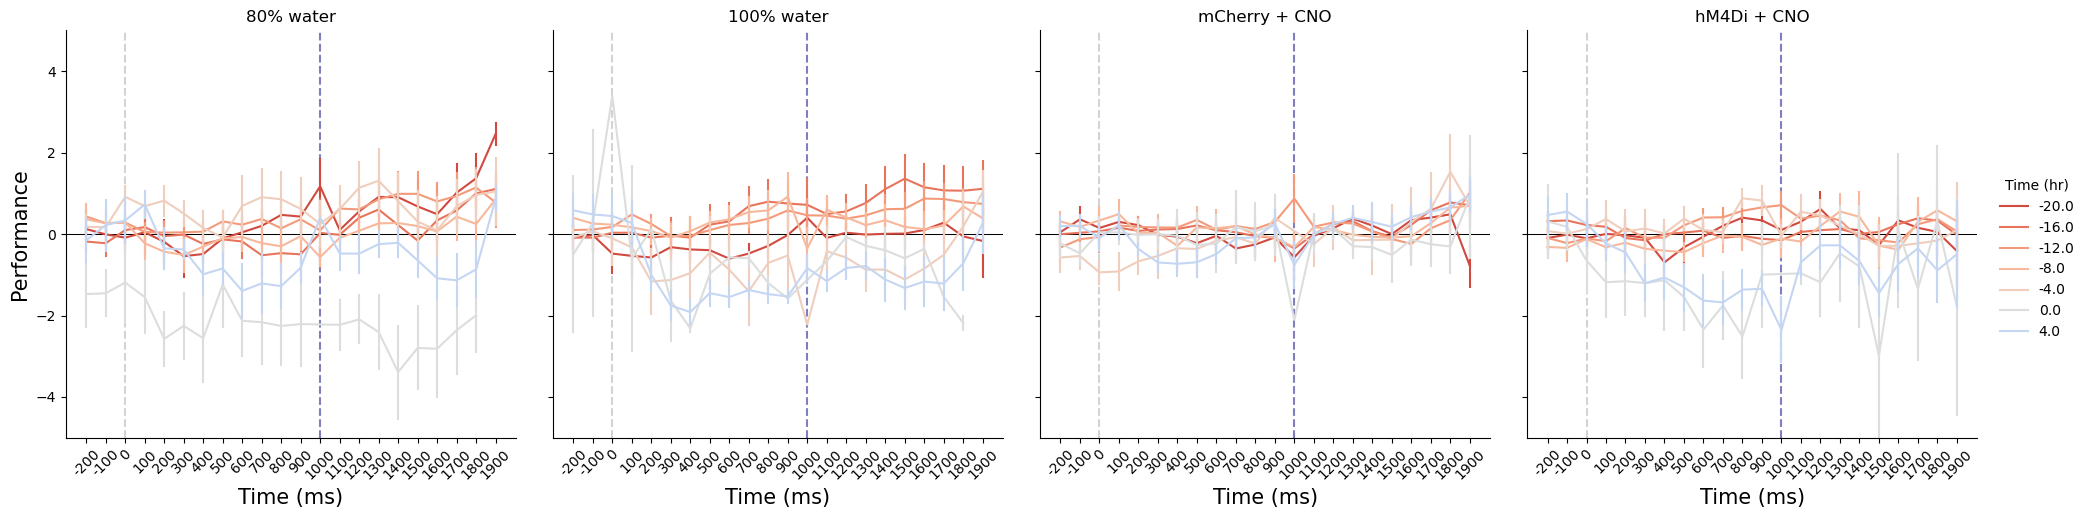

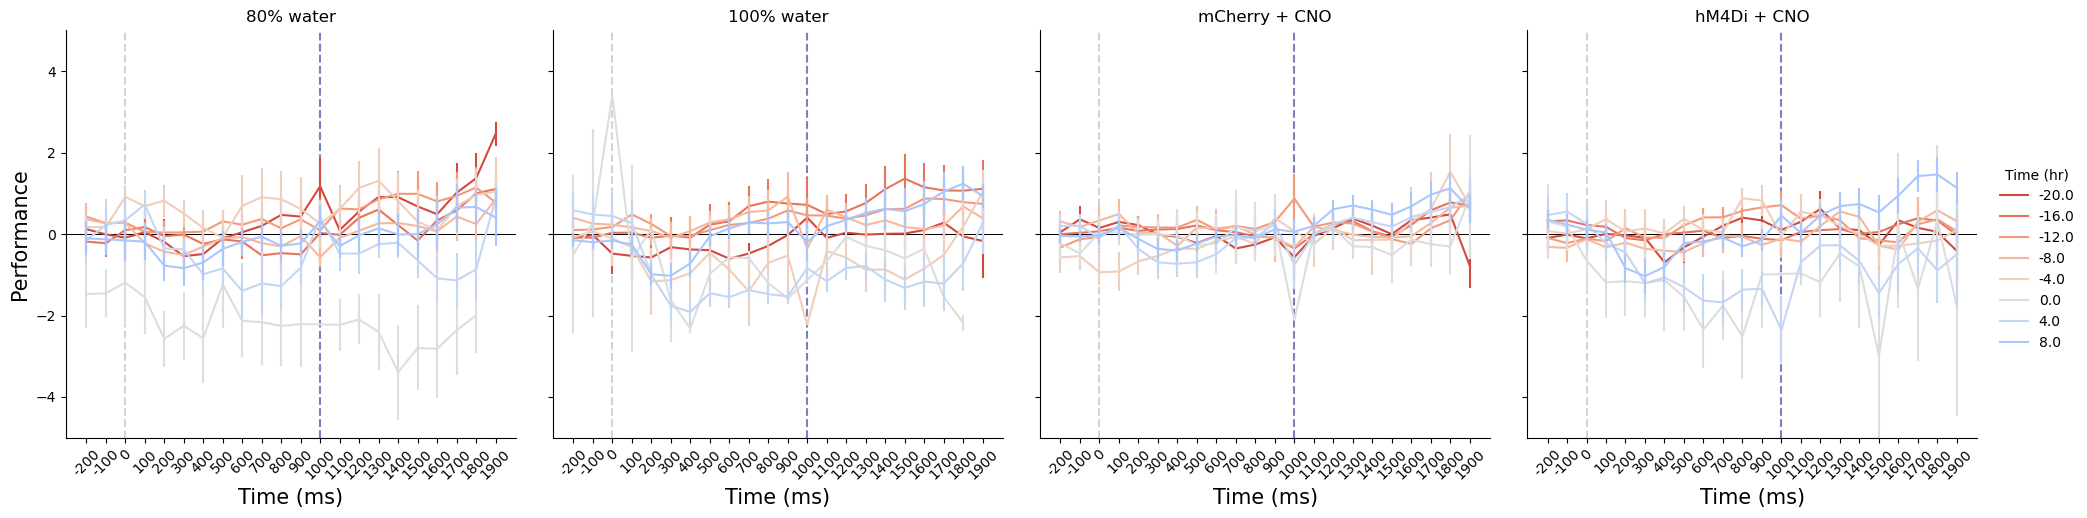

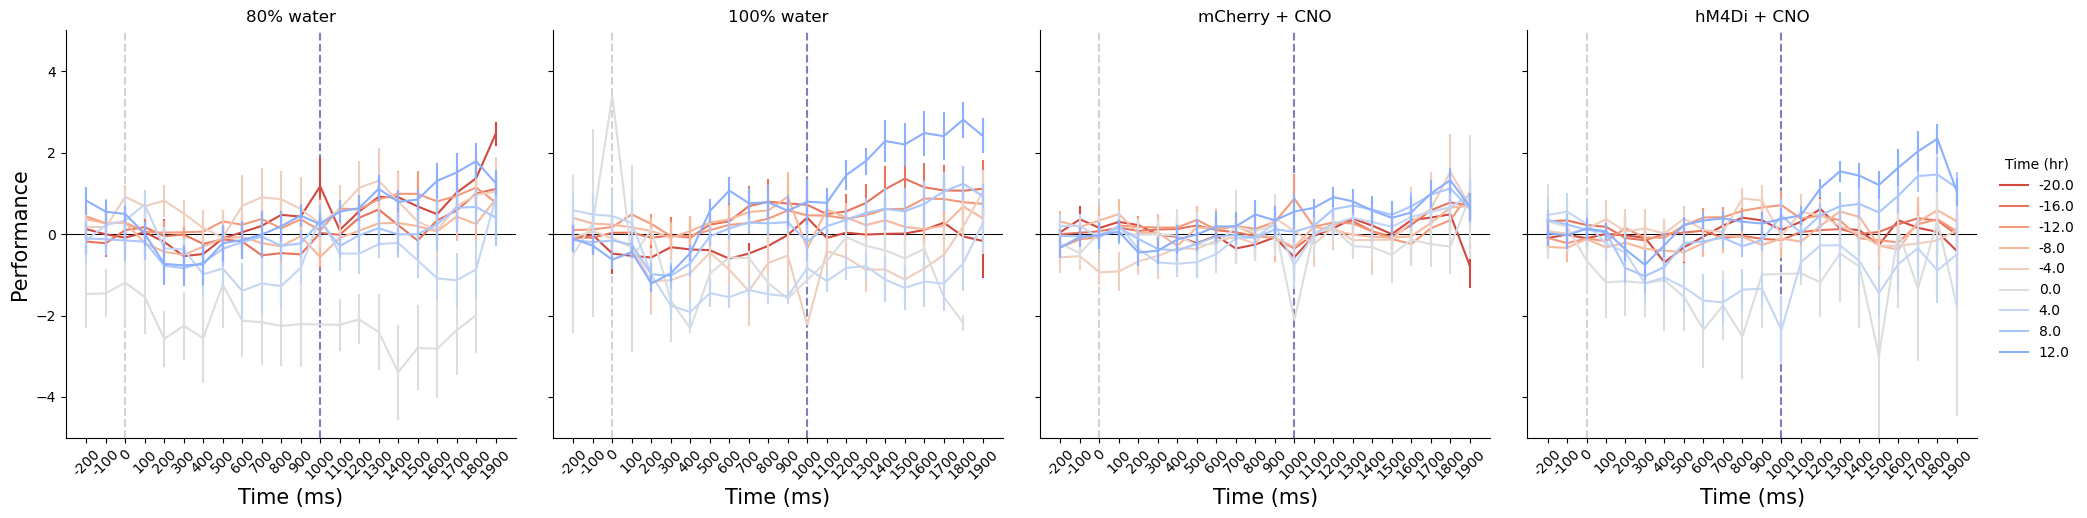

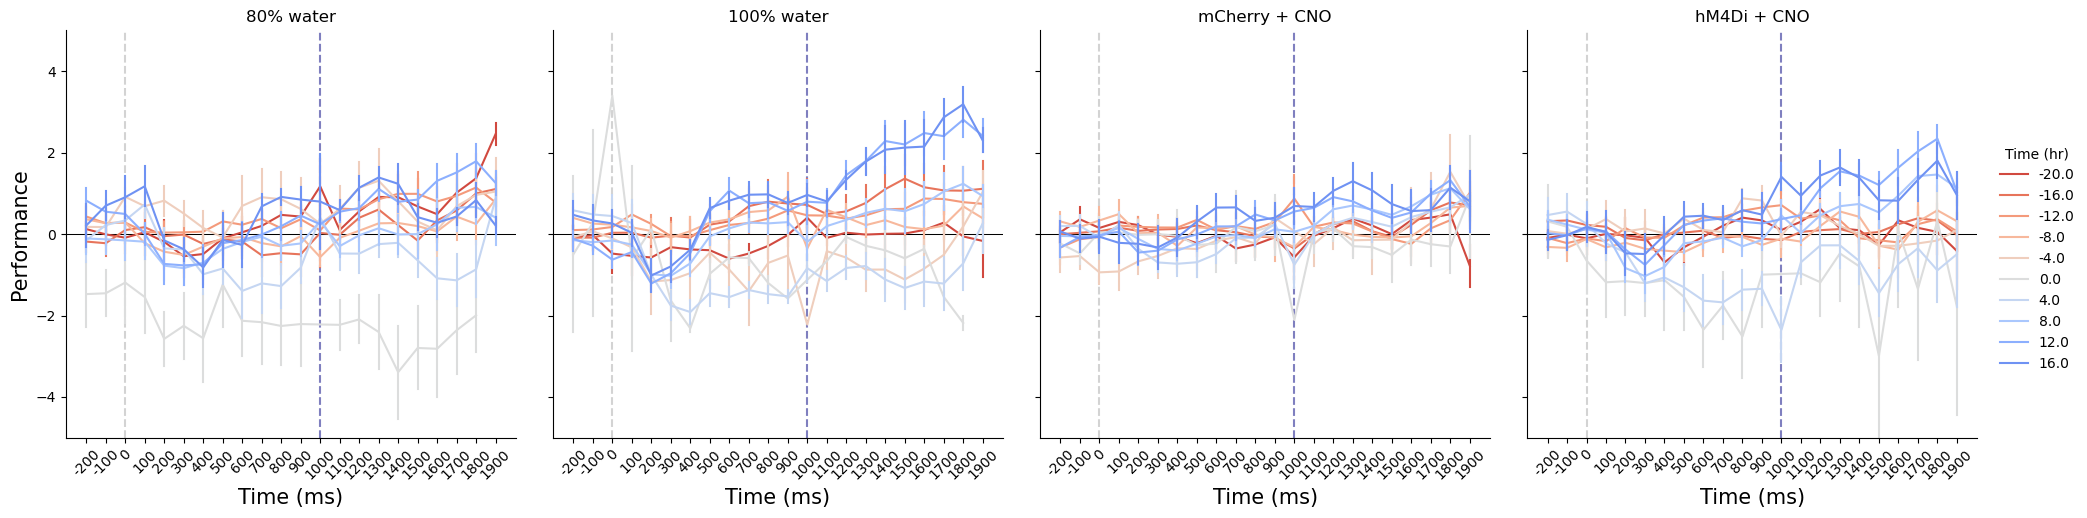

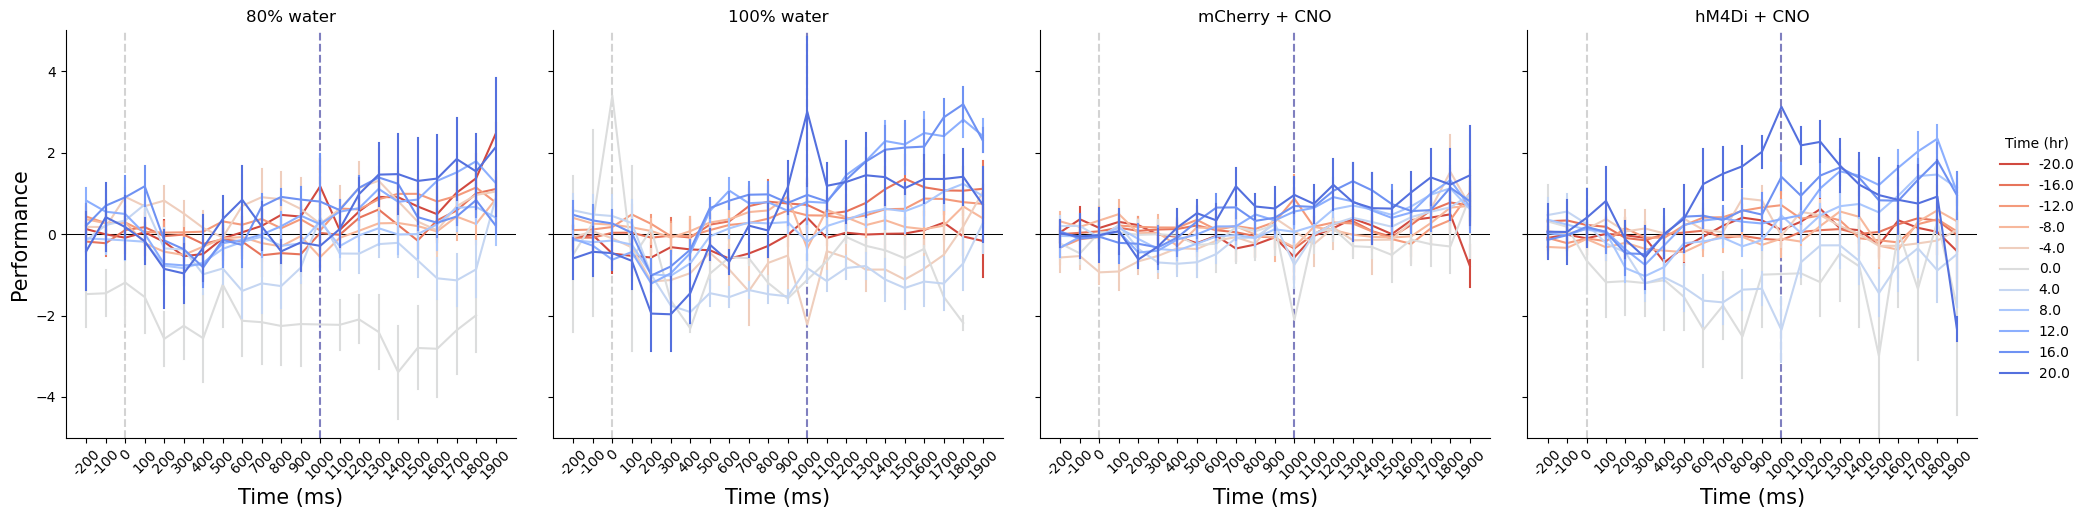

In [117]:
# only plot last day of acclimation and first day of SAT
cond = (perf4h["Time (hr)"] < 24) & (perf4h["Time (hr)"] > -24)
titles = {"all_reward":"100% water", "SAT": "80% water", "hm4di":"hM4Di + CNO", "mcherry":"mCherry + CNO"}
# plot all timebins average performance trace on the same plot
ticks = range(-200, 2000, 100)
for h in range(-20, 24, 4):
    #for condition in perf4h["condition"].unique():
    g = sns.relplot(data=perf4h[cond & (perf4h["Time (hr)"] <= h)],kind="line",x="Time (ms)", y="lick",
                    hue="Time (hr)", palette=sns.color_palette("coolwarm_r", n_colors=11), errorbar="se",err_style="bars", legend="full",
                    col="condition", col_order=["SAT", "all_reward", "mcherry", "hm4di"])
    # add lines at air puff and water delivery
    for (name, ax) in g.axes_dict.items():
        ax.axhline(y=0, xmin=0, xmax=1, ls="-", lw=0.75,color="black", zorder=0)
        ax.axvline(x=0, ymin=0, ymax=1, ls="--", color="lightgrey", zorder=0)
        ax.axvline(x=1000, ymin=0, ymax=1, ls="--", color="navy", alpha=0.5, zorder=0)
        ax.set_ylim([-5, 5])
        ax.set_ylabel("Performance", size=15)
        ax.set_xlabel("Time (ms)", size=15)
        ax.set_xticks(ticks)
        ax.set_xticklabels(ticks, ha="center", rotation=45)
        ax.set_title(f"{titles[name]}")

#### 1 hour timebins

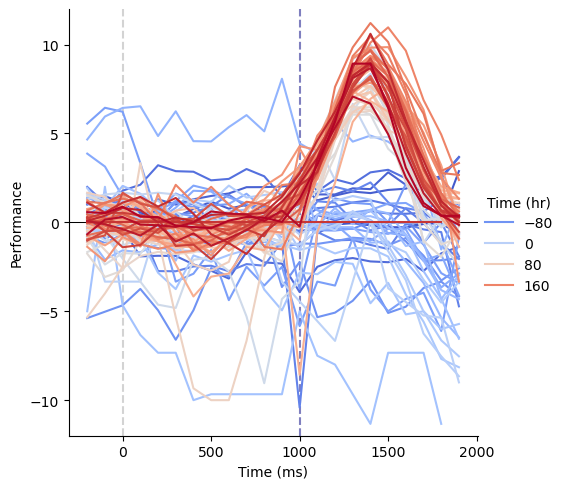

In [15]:

# plot all timebins average performance trace on the same plot
g = sns.relplot(data=performance,kind="line",x="Time (ms)", y="lick", 
                hue="Time (hr)", palette="coolwarm", errorbar="se",err_style="bars", legend="brief")

# add lines at air puff and water delivery
for ax in g.axes.flat:
    ax.axhline(y=0, xmin=0, xmax=1, ls="-", lw=0.75,color="black", zorder=0)
    ax.axvline(x=0, ymin=0, ymax=1, ls="--", color="lightgrey", zorder=0)
    ax.axvline(x=1000, ymin=0, ymax=1, ls="--", color="navy", alpha=0.5, zorder=0)
    ax.set_ylim([-12, 12])
    ax.set_ylabel("Performance")